<a href="https://colab.research.google.com/github/Cin1297/Komputasi-Lanjut-dan-Big-Data-2022/blob/main/Project_UTS_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Project UTS - Sheet1.csv to Project UTS - Sheet1.csv


In [7]:
import io
mydata = pd.read_csv(io.BytesIO(uploaded['Project UTS - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [21]:
NumberOfClusters = 8

In [22]:
NameOfDataFile = "Project UTS - Sheet1.csv"

In [23]:
import pandas as pd
import os

mydata = pd.read_csv(NameOfDataFile)
mydata_original = mydata.copy()

# mydata.head()

mydata.info()

mydata.describe().round(decimals=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SukaMTKSMA            733 non-null    int64  
 1   NilaiMTKsem6          733 non-null    float64
 2   Alatbantupenglihatan  733 non-null    int64  
 3   TB                    733 non-null    float64
 4   BB                    733 non-null    float64
 5   Games1                733 non-null    float64
 6   Games2                733 non-null    float64
 7   waktu_Medsos          733 non-null    float64
 8   label                 733 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 51.7+ KB


,SukaMTKSMA,NilaiMTKsem6,Alatbantupenglihatan,TB,BB,Games1,Games2,waktu_Medsos
count,733.0,733.0,733.0,733.0,733.0,733.0,733.0,733.0
mean,0.8,90.0,0.5,164.7,59.0,0.5,0.5,4.6
std,0.4,6.9,0.5,8.6,14.1,0.5,1.0,2.7
min,0.0,0.0,0.0,143.0,37.0,0.0,0.0,0.0
25%,1.0,87.0,0.0,158.0,49.0,0.3,0.3,3.0
50%,1.0,90.0,1.0,165.0,56.0,0.4,0.4,4.0
75%,1.0,94.0,1.0,171.0,65.0,0.6,0.6,6.0
max,1.0,100.0,1.0,188.0,170.0,8.6,26.7,16.0


In [24]:
X_var = "Medu"
Y_var = "G3"



Desired number of clusters: 8




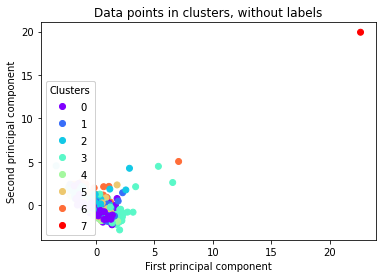

In [25]:
print("\n\nDesired number of clusters: " + str(NumberOfClusters)+"\n\n")

# categories to dummies
mydata_dummies = pd.get_dummies(mydata_original, drop_first=True)
# mydata_dummies.head()
# mydata_dummies.info()

# standardize
from sklearn.preprocessing import StandardScaler
mydata_std=pd.DataFrame(StandardScaler().fit_transform(mydata_dummies))
# mydata_std.head()

# PCA
# from https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(mydata_std)
PCA_components = pd.DataFrame(principalComponents)
PCA_components = PCA_components.add_prefix('PCA_')
# PCA_components.head()
mydata = mydata_original.join(PCA_components, rsuffix="_PCA") 
# mydata.head()
# mydata.info()

from sklearn.cluster import KMeans
kmeans = KMeans(NumberOfClusters)
kmeans.fit(mydata_std)
identified_clusters = kmeans.fit_predict(mydata_std)

# data_with_clusters = mydata.copy()
# mydata['Clusters'] = identified_clusters.tolist()
mydata = mydata.join(pd.DataFrame(identified_clusters, columns = ['Clusters']), rsuffix="_C")



# type(identified_clusters.tolist())
# len(identified_clusters)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
scatter = ax.scatter(mydata['PCA_0'],mydata['PCA_1'],c=mydata['Clusters'],cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
ax.add_artist(legend1)
plt.title("Data points in clusters, without labels")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

'''
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

from https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
'''

plt.show()
mydata.to_csv('datafile1_result1.csv')